In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
ds = datasets.load_boston()
#print(ds.keys())
filename = ds.filename
print(filename)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv


In [8]:
boston = pd.read_csv(filename, header=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [28]:
X_room = X[:,5]

In [30]:
print(X_room.shape)
print(y.shape)
print(X_room[:5,])
print(y[:5,])

(506,)
(506,)
[6.575 6.421 7.185 6.998 7.147]
[24.  21.6 34.7 33.4 36.2]


In [31]:
X_room = np.reshape(X_room, (-1, 1))
y = np.reshape(y, (-1, 1))

In [32]:
print(X_room.shape)
print(y.shape)
print(X_room[:5,])
print(y[:5,])

(506, 1)
(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


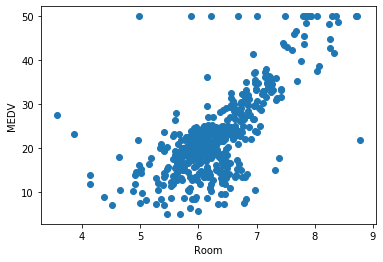

In [36]:
plt.scatter(X_room, y)
plt.xlabel('# Room')
plt.ylabel('MEDV')
plt.show()

In [39]:
reg = LinearRegression()
reg.fit(X_room, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
prediction_space = np.linspace(min(X_room), max(X_room))
print(prediction_space.shape)
print(prediction_space[:5,:])

(50, 1)
[[3.561     ]
 [3.6675102 ]
 [3.77402041]
 [3.88053061]
 [3.98704082]]


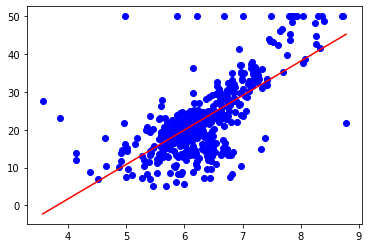

In [46]:
plt.scatter(X_room, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='red')
plt.show()

In [48]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


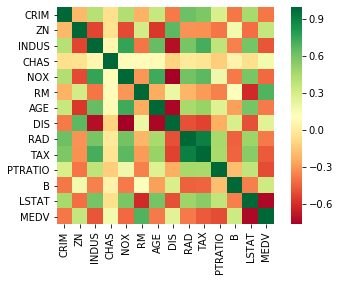

In [49]:
sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')